In [1]:
%pylab inline
%load_ext music21.ipython21

Populating the interactive namespace from numpy and matplotlib


In [2]:
from music21 import *
import seaborn as sns
from matplotlib import gridspec

import sys
sys.path.append('/home/fl350/bachbot/scripts')
import datasets

In [10]:
catalog = stream.Opus()
catalog_transpose = stream.Opus() # transposed to Cmaj/Amin
catalog_transpose_quantize = stream.Opus() # transposed and quantized
for workName in corpus.getBachChorales()[:10]:
    work = converter.parse(workName)
    firstTS = work.flat.getTimeSignatures()[0]
    if firstTS.ratioString == '4/4': #Filter for every Bach chorale that is in 4/4
        catalog.append(work)
        transposed = datasets.standardize_key(work)
        catalog_transpose.append(transposed)
        catalog_transpose_quantize.append(transposed.quantize([2]))

In [9]:
s = catalog[2]
s_transpose = catalog_transpose[0]
s_transpose_quantize = catalog_transpose_quantize[0]

print s.metadata.title

StreamException: attempting to access index 2 while elements is of size 2

Standard music score notation

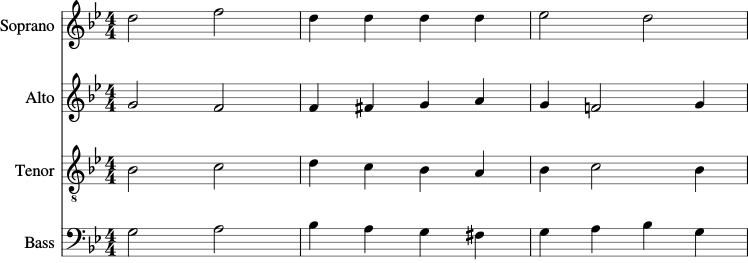

In [6]:
s_subset = s.measures(0, 3)
#s_subset.write('lily.svg', 'bwv17-original.svg')
s_subset.write('musicxml.png', 'bwv10-7-original-score.xml')
s_subset.show()

Piano roll representation

In [7]:
def plot_piano_roll(s):
    g = graph.PlotHorizontalBarPitchSpaceOffset(s)
    data, xTicks, _ = g._extractData()

    plt.figure(figsize=(18,6))
    #plt.subplots_adjust(left=0.15)   

    yPos = 0
    xPoints = [] # store all to find min/max
    yTicks = [] # a list of label, value pairs

    colors = sns.color_palette("muted")

    keys = []
    i = 0
    for i, (key, points) in enumerate(data):
        keys.append(key)
        if len(points) > 0:
            yrange = (yPos + 1, 1)
            plt.broken_barh(points,
                            yrange,
                            facecolor=colors[i%len(colors)],
                            alpha=0.8)
            for xStart, xLen in points:
                xEnd = xStart + xLen
                for x in [xStart, xEnd]:
                    if x not in xPoints:
                        xPoints.append(x)
        yTicks.append([yPos + 1 * .5, key])
        yPos += 1
        i += 1

    xMin = min(xPoints)
    xMax = max(xPoints) 
    xRange = xMax - xMin

    plt.ylim(0, len(keys) * 1)
    plt.xlim(xMin - 4, xMax + 4)
    plt.yticks(*zip(*yTicks))
    plt.xticks(*zip(*xTicks))

    plt.title('Piano roll of JCB Chorale BWV 1.7')
    plt.xlabel('Measure number')
    plt.ylabel('Pitch')

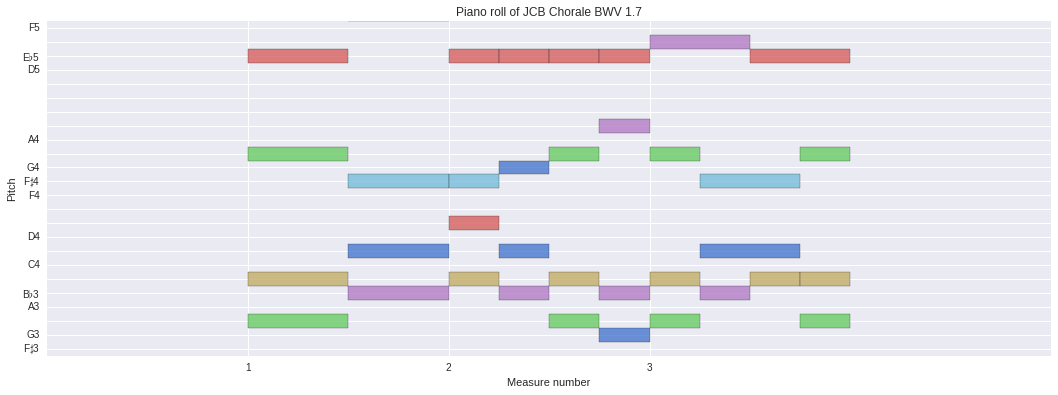

In [8]:
plot_piano_roll(s_subset)
plt.savefig('bwv17-original-piano-roll.png')
plt.show()

In [ ]:
plot_piano_roll(s_transpose_quantize)
plt.savefig('piano-roll-transpose-quantize.png')
plt.show()

Meter profile of JCB: very regular at quarter or eighth positions within a measure, partially justifies quantization

In [ ]:
#Count usages
allbeats = list();
for p in catalog.flat.notes:
    for counter in range(len(p.pitches)):
        allbeats.append(p.beat - 1)

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(allbeats, bins=32, range=(0,5))
plt.xlabel("Offset from start of measure (crotchets)")
plt.ylabel("Count")
plt.title('Note occurence positions within a measure over JCB chorales corpus')
plt.xlim(0,4)
plt.xticks(np.arange(0, 5, 1.0))
plt.savefig('meter-usage.png')
plt.show() 

Note lengths: justify quantization to 8th or 16th notes

In [ ]:
plt.figure(figsize=(8,4))

data, xTicks, _ = graph.PlotHistogramQuarterLength(catalog)._extractData()
plt.bar(*zip(*data), width=0.2, align='center')
plt.xlabel('Note length (crotchets)')
plt.xlim(0,4)
plt.ylabel('Count')
plt.title('Note lengths over JCB chorales corpus')

plt.savefig('note-lengths.png')
plt.show()

Pitch usage profile

In [ ]:
plt.figure(figsize=(18,5))

data, xTicks, _ = graph.PlotHistogramPitchSpace(catalog)._extractData()
plt.bar(*zip(*data))
plt.xticks(*zip(*xTicks))
plt.xlabel('Pitch')
plt.ylabel('Count')
plt.suptitle('Pitch usage over JCB chorales (original)')

plt.savefig('pitch-usage.png')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))

data, xTicks, _ = graph.PlotHistogramPitchClass(catalog)._extractData()
plt.bar(*zip(*data))
plt.xticks(*zip(*xTicks))
plt.xlabel('Pitch Class')
plt.ylabel('Count')
title('Pitch class usage over JCB chorales (original)')

plt.savefig('pitch-class-usage.png')
plt.show()

In [ ]:
plt.figure(figsize=(18,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

plt.subplot(gs[0])
data, xTicks, _ = graph.PlotHistogramPitchSpace(catalog)._extractData()
plt.bar(*zip(*data))
plt.xticks(*zip(*xTicks))
plt.xlabel('Pitch')
plt.ylabel('Count')

plt.subplot(gs[1])
data, xTicks, _ = graph.PlotHistogramPitchClass(catalog)._extractData()
plt.bar(*zip(*data))
plt.xticks(*zip(*xTicks))
plt.xlabel('Pitch Class')
plt.ylabel('Count')

plt.show()

Joint pitch/note length usages

In [ ]:
data, xTicks, yTicks = graph.PlotScatterWeightedPitchClassQuarterLength(s)._extractData()

In [ ]:
x, y, sz = zip(*data)
plt.scatter(x,y,s=10*sz)
plt.xlabel(*zip(*xTicks))
plt.ylabel(*zip(*yTicks))
plt.title('')

plt.savefig('pitch-duration-scatterplot.png')
plt.show()

In [ ]:
graph.PlotScatterWeightedPitchClassQuarterLength(s).process()